# Exercise 1: Build and Plot k-Means


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

from sklearn.datasets import make_blobs

**Step 1:** create blobs with the size of 500, and center of 3

In [22]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.4, random_state=0)

# random_state = Determines random number generation for dataset creation.
# Pass an int for reproducible output across multiple function calls
# cluster_std = The standard deviation of the clusters.

**Step 2:** Plot the distribution of the blobs

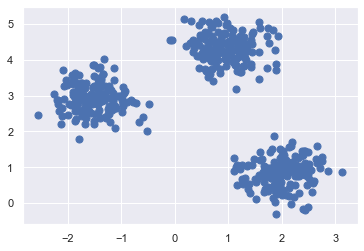

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=50);

**Step 3:** Use K-means, find the centers of these clusters

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Step 4:** Plot the blobs with the found centers

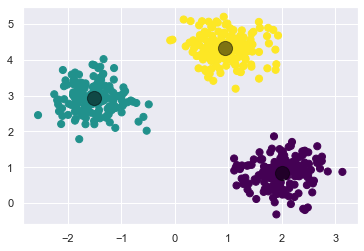

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

Step 5: How can you find out the automatically assigned "labels" in the produced clusters?

In [26]:
print(kmeans.labels_)

[2 1 1 2 2 2 2 1 1 2 1 1 1 1 2 2 0 2 1 2 0 0 0 1 2 1 0 1 2 1 1 2 2 2 0 0 0
 0 0 0 1 2 2 0 0 2 0 2 1 1 2 2 2 2 1 1 0 0 2 1 0 1 0 0 0 1 2 0 1 2 1 2 2 1
 0 1 0 0 0 2 2 2 1 2 1 0 1 1 1 1 2 2 0 2 1 0 1 1 1 2 0 1 1 2 2 0 2 0 2 0 2
 2 0 1 1 0 1 0 0 1 1 2 1 1 1 2 1 2 1 2 0 2 1 0 2 0 1 1 0 2 2 1 1 0 2 2 2 0
 0 2 0 2 2 2 0 2 1 0 1 2 0 0 1 1 1 0 2 0 2 0 1 1 0 2 2 1 1 0 0 0 0 0 1 1 0
 0 2 0 2 1 1 2 0 0 2 1 0 2 1 0 1 0 2 2 1 0 0 0 1 1 2 0 0 1 1 2 1 2 1 1 0 1
 0 0 2 2 2 0 1 2 2 1 1 0 1 1 2 0 2 2 2 0 0 0 2 1 1 1 1 1 0 1 1 2 1 1 2 0 1
 0 0 2 2 0 0 2 1 0 1 0 0 1 0 2 2 0 2 0 0 0 0 1 0 2 2 2 2 1 1 0 0 1 1 2 2 0
 1 2 1 0 2 0 1 0 2 1 2 0 2 1 0 1 1 2 2 2 0 1 1 2 2 0 1 0 2 2 0 0 2 1 0 2 0
 1 0 0 2 1 2 1 0 1 0 2 2 2 0 2 2 1 0 2 1 1 1 2 0 0 0 1 2 0 1 2 2 2 1 2 1 2
 1 1 2 1 1 1 1 0 0 1 0 1 1 1 1 2 2 2 0 1 2 0 2 0 2 0 1 1 2 1 0 2 0 1 1 2 0
 1 0 1 2 2 2 0 1 2 2 0 1 1 2 1 0 2 1 2 0 2 1 2 2 0 2 2 2 2 0 2 0 1 0 0 2 1
 0 1 0 1 0 2 1 0 0 0 0 0 2 1 0 1 2 2 0 1 1 2 1 0 2 2 0 0 1 0 1 0 0 0 0 1 2
 0 0 2 0 1 1 2 0 0 1 2 1 

Step 6: How about classes? How to find out where there are classes.

In [27]:
print(set(kmeans.labels_))

{0, 1, 2}


# Exercise 2: k-Means with the Iris dataset


**Step 1:** Load the iris dataset from sklearn and other necessary libraries

In [28]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris_data = datasets.load_iris()

In [29]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:
# iris_data.head()
# iris_data.info()
# iris_data.isnull()

**Step 2:** Set the training and target data as X and y respectively. Display the targets.

In [31]:
x, y = iris_data.data, iris_data.target

Introducing - *the Elbow Method:*
A technique to allow you to identify the best K

General idea: iterate the creation of k-Means clusters with increasing sizes, and record down the value of kmeans.inertia_ (inertia_: Sum of squared distances of samples to their closest cluster center.)

**Step 3:** create a list named wcss and store the inertia values for a selected range of ks.

In [32]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=45)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Step 4:** Plot a graph to look at 'The elbow'

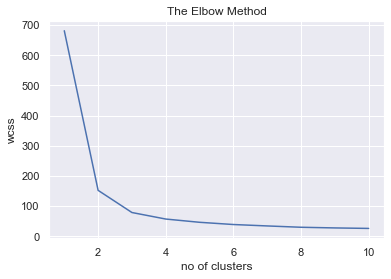

In [33]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

**Step 5:** Apply the best K for your k-means clustering

In [34]:
# X, y_true = iris_data(n_samples=300, centers=3,
#                        cluster_std=0.60, random_state=0)
# plt.scatter(X[:, 0], X[:, 1], s=50);

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

**Step 6:** Visualize the clusters. Name the clusters accordingly, and also plot the centriods.


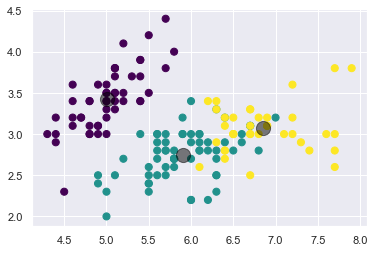

In [36]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

**Step 7:** Plot the actual and Predicted side by side

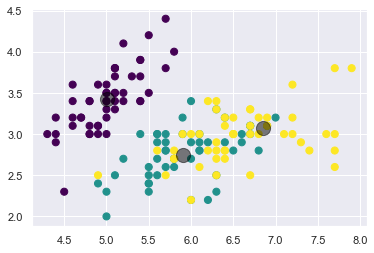

In [37]:
# ACTUAL Y DATA
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


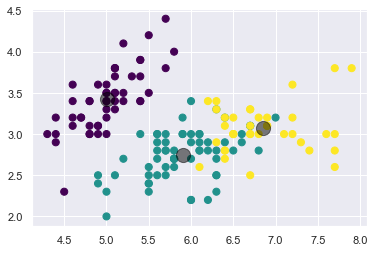

In [38]:
#PREDICTED Y DATA
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);